In [31]:
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

### A bit of toying with sigmoid

In [12]:
def sigmoid(x):  
    return np.exp(-np.logaddexp(0, -x))

xax = np.arange(-10, 10, 0.05)

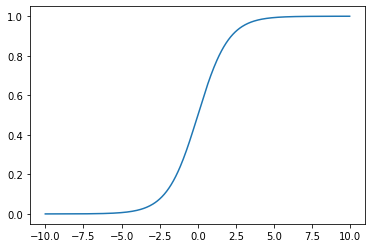

In [13]:
sns.lineplot(x = xax, y = sigmoid(xax))

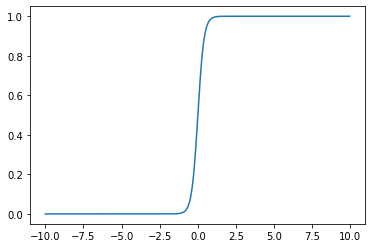

In [14]:
sns.lineplot(x = xax, y = sigmoid(5*xax))

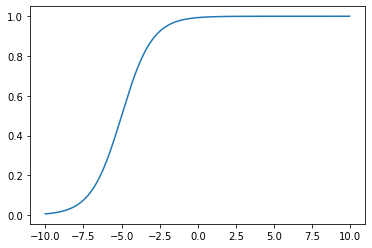

In [17]:
sns.lineplot(x = xax, y = sigmoid(xax + 5))

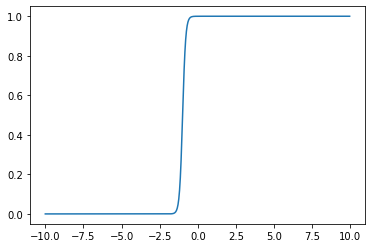

In [18]:
sns.lineplot(x = xax, y = sigmoid(10 * xax + 10))

In [26]:
well_switch = pd.read_csv("./ARM_Data/arsenic/wells.dat", delimiter=" ")

In [27]:
well_switch.head()

,switch,arsenic,dist,assoc,educ
1,1,2.36,16.826000,0,0
2,1,0.71,47.321999,0,0
3,0,2.07,20.966999,0,10
4,1,1.15,21.486000,0,12
5,1,1.10,40.874001,1,14


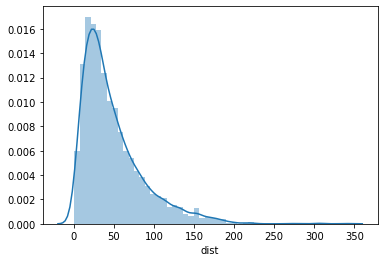

In [29]:
sns.distplot(well_switch.dist, kde=True)

In [30]:
well_switch.switch.value_counts()

1    1737
0    1283
Name: switch, dtype: int64

In [39]:
switch_mdl_logit = sm.Logit(exog = sm.add_constant(well_switch[['dist']]), endog=well_switch.switch).fit()
switch_mdl_logit.summary()

Optimization terminated successfully.
         Current function value: 0.674874
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 switch   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3018
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Mar 2020   Pseudo R-squ.:                 0.01017
Time:                        14:28:15   Log-Likelihood:                -2038.1
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 9.798e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6060      0.060     10.047      0.000       0.488       0.724
dist          -0.0062      0.001     -6.383      0.000      -0.008      -0.004
==============================================================================
"""

Just to check that generic GLM+Binomial+logit gives the same numbers.

In [40]:
switch_mdl_glm = sm.GLM(exog = sm.add_constant(well_switch[['dist']]), endog=well_switch.switch, family=sm.families.Binomial()).fit()
switch_mdl_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 switch   No. Observations:                 3020
Model:                            GLM   Df Residuals:                     3018
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.1
Date:                Mon, 09 Mar 2020   Deviance:                       4076.2
Time:                        14:28:17   Pearson chi2:                 3.02e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6060      0.060     10.047      0.000       0.488       0.724
dist          -0.0062      0.001     -6.383      0.000      -0.008      -0.004
==============================================================================
"""

AttributeError: 'Logit' object has no attribute 'weights'

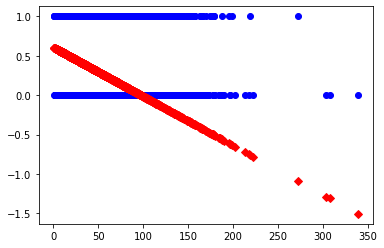

In [42]:
sm.graphics.plot_fit(switch_mdl_logit, exog_idx="dist")